In [23]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
torch.manual_seed(42)

In [25]:
df = pd.read_csv("datasets/fmnist_small.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


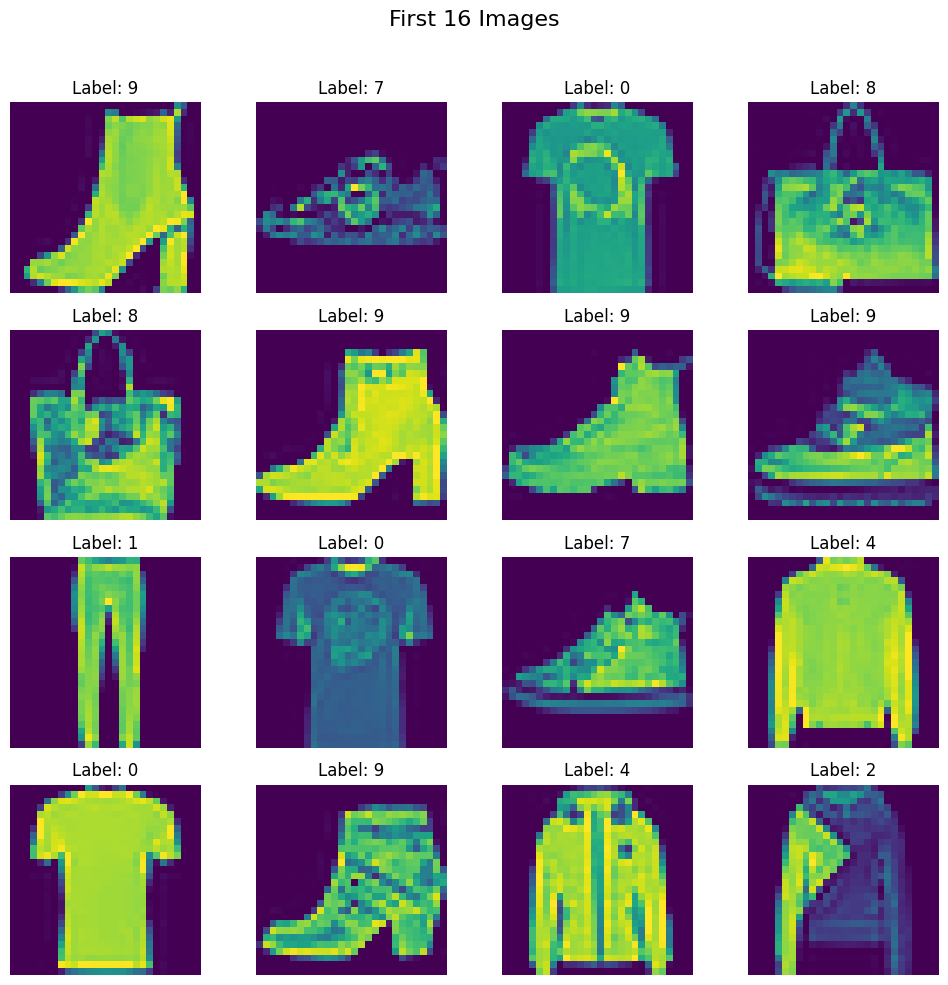

In [26]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [27]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [30]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)


In [31]:
train_dataset.__getitem__(0)  # Check the first item in the dataset

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [32]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [43]:
learning_rate = 0.1
epochs = 100
criterion = nn.CrossEntropyLoss()

In [44]:
class MySimpleNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        out = self.network(x)
        return out

In [49]:
model = MySimpleNN(X_train.shape[1])
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [52]:
for epoch in range(epochs):
    total_epoch_loss = 0.0
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        total_epoch_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader):.4f}")
   

Epoch 10/100, Loss: 0.1125
Epoch 20/100, Loss: 0.0764
Epoch 30/100, Loss: 0.0679
Epoch 40/100, Loss: 0.0301
Epoch 50/100, Loss: 0.0392
Epoch 60/100, Loss: 0.0547
Epoch 70/100, Loss: 0.0695
Epoch 80/100, Loss: 0.0037
Epoch 90/100, Loss: 0.0092
Epoch 100/100, Loss: 0.0012


In [53]:
#set model to evaluation mode
model.eval()


MySimpleNN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [57]:
#evalution code
total = 0
correct = 0
with torch.no_grad():
    
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.shape[0]
        correct += (predicted == batch_labels).sum().item()
    
accuracy = correct / total
print(f"Accuracy: {accuracy:.4f}") 

Accuracy: 0.8350


In [ ]:
#to imporve the accuracy

#1. Use full dataset
#2. different optimizers
#3. different learning rates
#4. different architecturesm epochs , weight initialization, batch size, etc.
